## Algerian Forest Fires Dataset 
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Rv\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("D:\Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data cleaning

In [5]:
df.isna().any()

day            False
month           True
year            True
Temperature     True
 RH             True
 Ws             True
Rain            True
FFMC            True
DMC             True
DC              True
ISI             True
BUI             True
FWI             True
Classes         True
dtype: bool

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [7]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [9]:
df[["Region"]]=df[["Region"]].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [11]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [12]:
df=df.dropna().reset_index(drop=True)

In [13]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [15]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [16]:
df=df.drop(122).reset_index(drop=True)

In [17]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

#### Changes the required columns as integer data type

In [19]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [21]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [23]:
df[['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [25]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [26]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## EDA

In [27]:
dff=df.drop(["day","month","year"],axis=1)

In [28]:
dff.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [29]:
dff["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [30]:
dff["Classes"]=np.where(dff["Classes"].str.contains("not fire"),0,1)

In [31]:
dff.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [32]:
dff["Region"].value_counts()

Region
0    122
1    121
Name: count, dtype: int64

In [33]:
dff["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [34]:
dff.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>, <Axes: >, <Axes: >]],
      dtype=object)

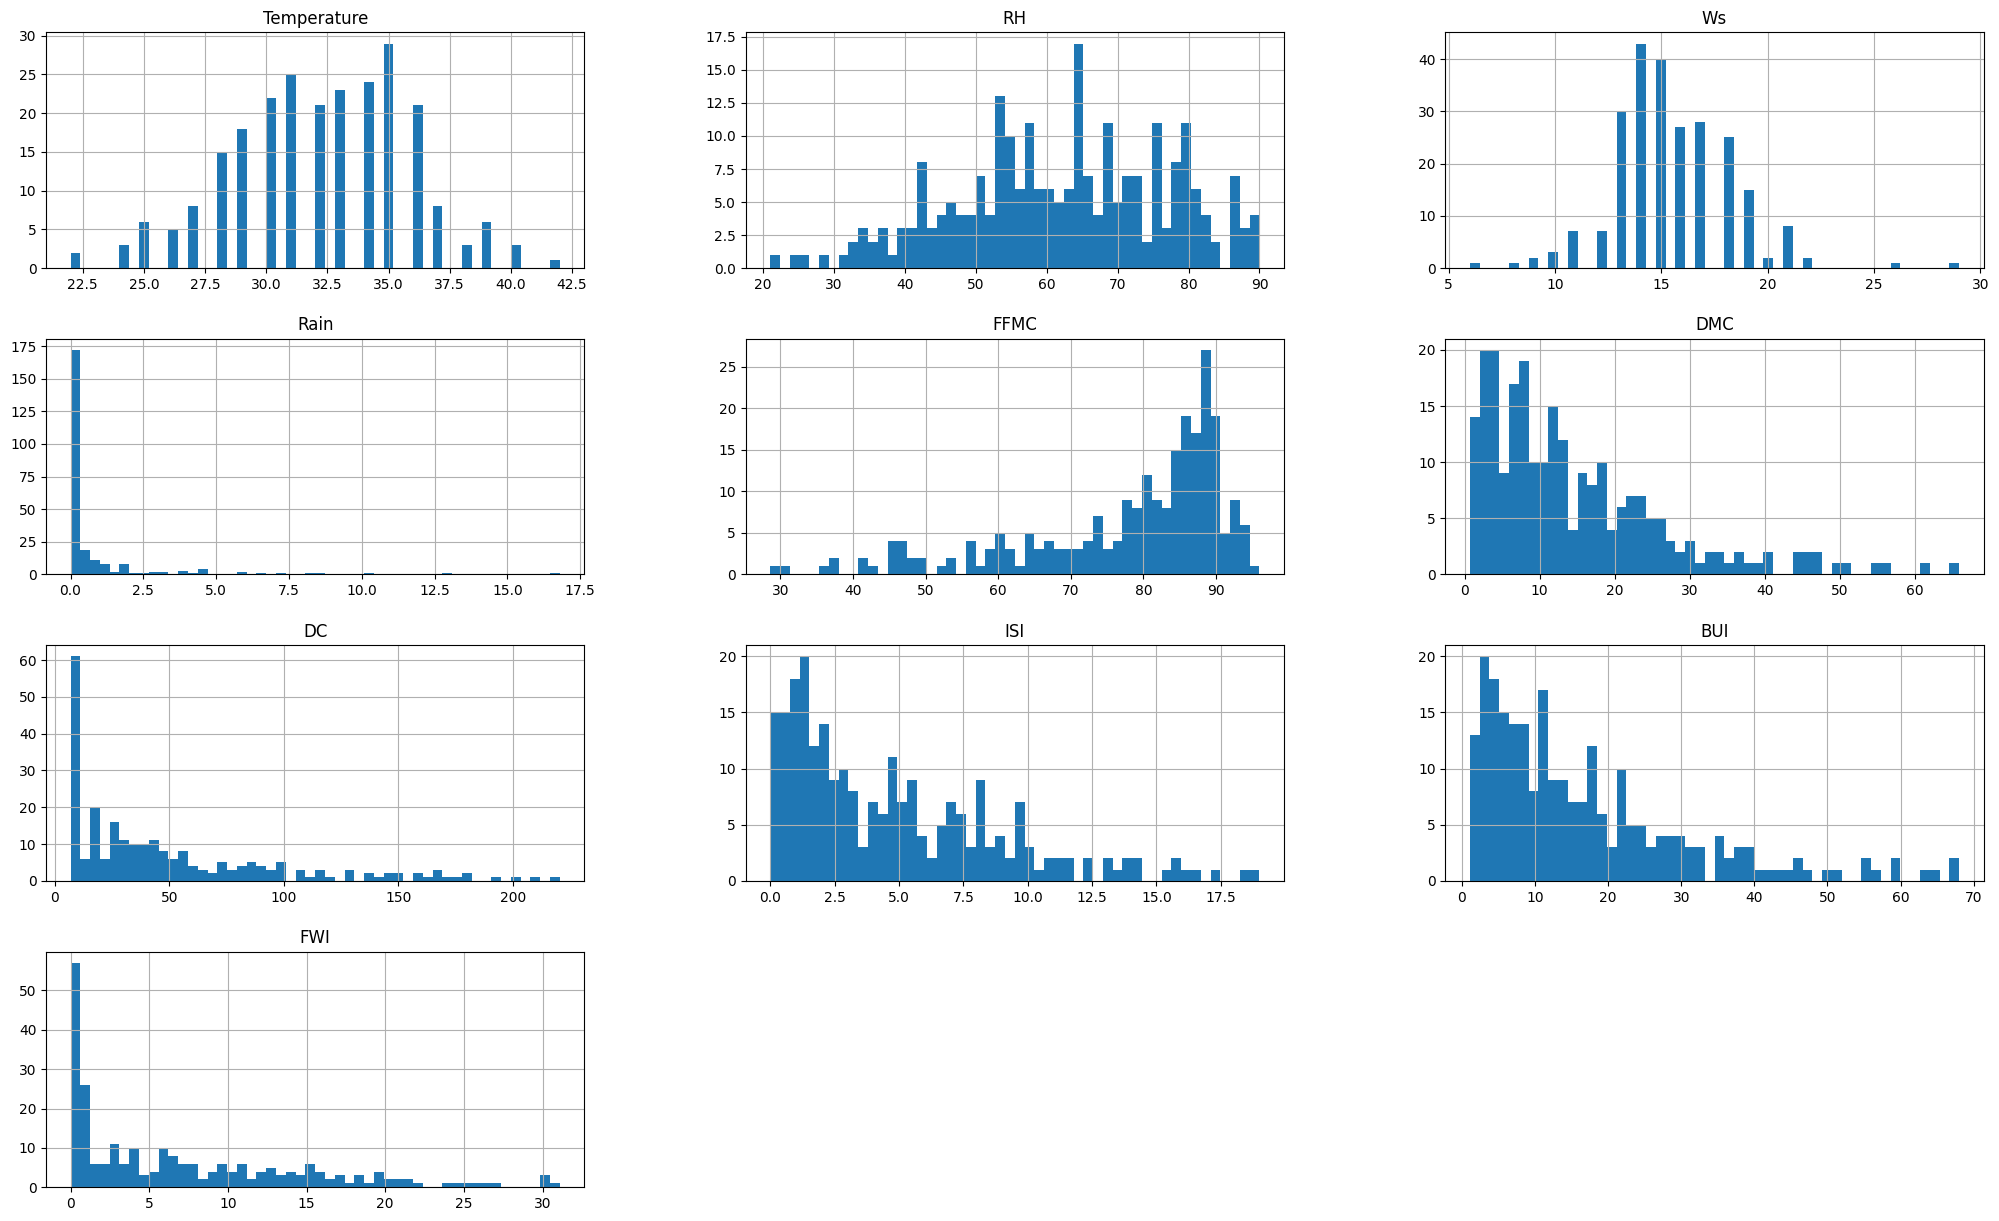

In [35]:
col=['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI']
dff[col].hist(stacked=False,bins=50,figsize=(25,15))

Temperature: Shows a roughly normal distribution centered around 30–35°C. This suggests the data was collected during hot summer months, prime for fire activity.

RH (Relative Humidity): Displays a wide spread, mostly between 40% and 80%. It is slightly multi-modal, indicating varying humidity levels a
cross the observation period.

Ws (Wind Speed): Concentrated between 13 and 18 km/h. This is a fairly tight distribution, suggesting moderate breezy conditions were common.

FFMC (Fine Fuel Moisture Code): Heavily left-skewed (peaks near 90). High FFMC values indicate very dry surface litter that ignites easily.

DMC & DC (Duff Moisture Code & Drought Code): Both are right-skewed. Most values are low, but the long tails show periods of prolonged drying in deeper organic layers.

Rain: Extremely right-skewed. The massive spike at 0.0 shows that most days in the dataset had no precipitation, which is typical for fire season modeling.

ISI (Initial Spread Index): Right-skewed, peaking at low values. This indicates that while most days have low fire spread potential, there are "outlier" days with high spread rates (linked to high wind and low fine fuel moisture).

BUI (Build-Up Index): Similar to DMC, this represents the total amount of fuel available for combustion.

In [36]:
dff.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [37]:
## Percentage for Pie Chart
percentage=dff['Classes'].value_counts(normalize=True)*100

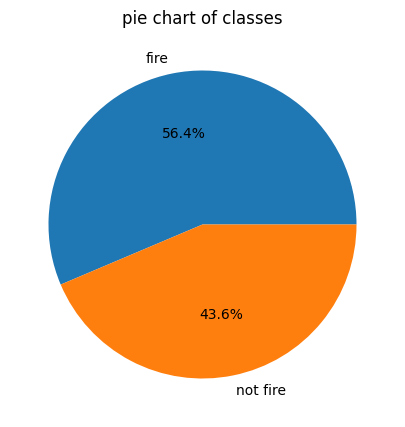

In [38]:
## Plotting the pie chart
classlables=["fire","not fire"]
plt.figure(figsize=(10,5))
plt.pie(percentage,labels=classlables,autopct="%1.1f%%")
plt.title("pie chart of classes")
plt.show()

In [39]:
dff.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

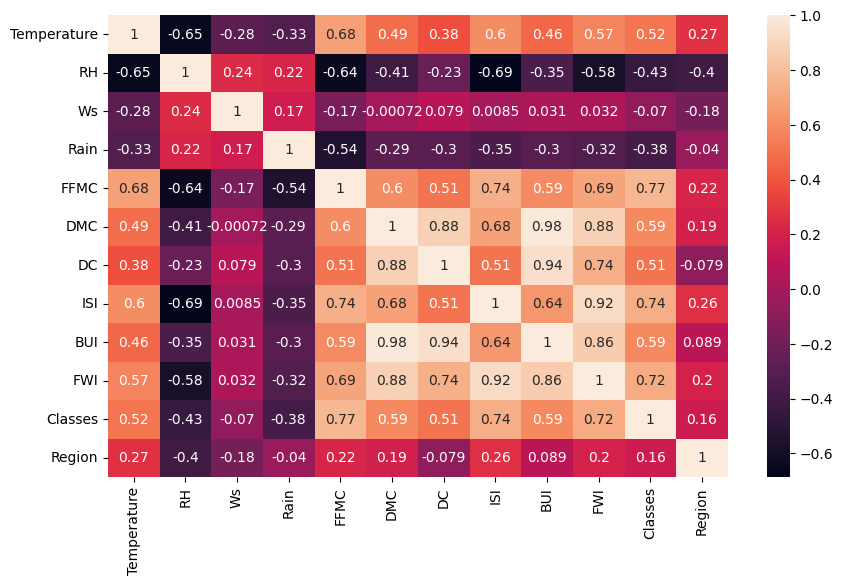

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(dff.corr(),annot=True)


Highly Redundant Variables (Multicollinearity)Several pairs show extremely high positive correlations (near $0.9$ or higher). In predictive modeling, keeping all of these might cause multicollinearity issues:

    DMC and BUI (0.98): These are nearly identical in their movement.
    
    DC and BUI (0.94): Very strong relationship.
    
    ISI and FWI (0.92): Very strong relationship.
    
    DMC and FWI (0.88): High correlation.

<Axes: ylabel='FWI'>

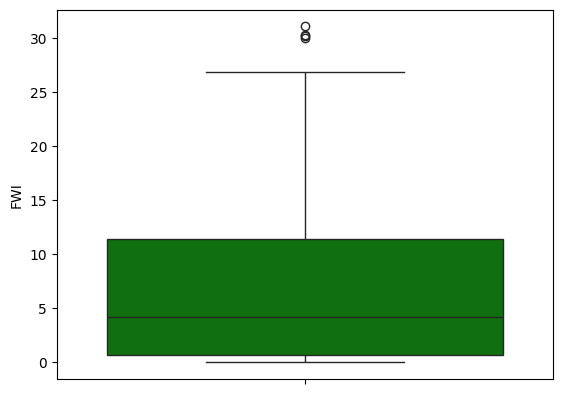

In [41]:
#box plot
sns.boxplot(df["FWI"],color="g")

In [42]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [43]:
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),"not fire","fire")

<Axes: xlabel='month', ylabel='count'>

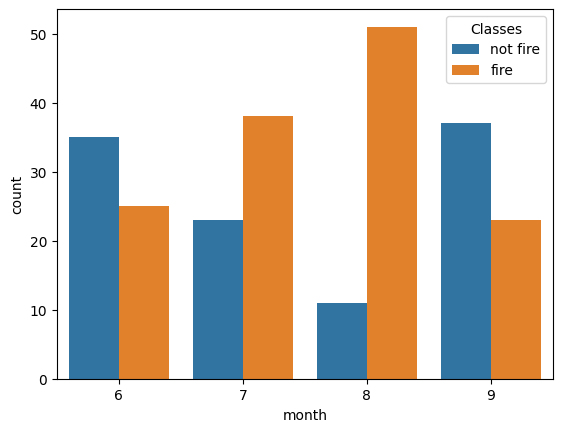

In [44]:
sns.countplot(x="month",hue="Classes",stat="count",data=df)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

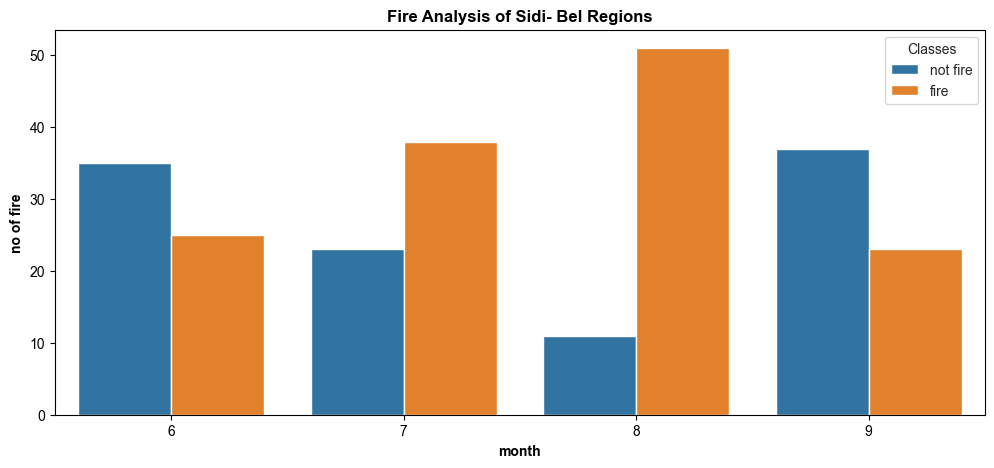

In [46]:
df1=df.loc[df["Region"]==1]
plt.subplots(figsize=(12,5))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=df)
plt.xlabel("month",weight="bold")
plt.ylabel("no of fire",weight="bold")
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of brjajia-  Regions')

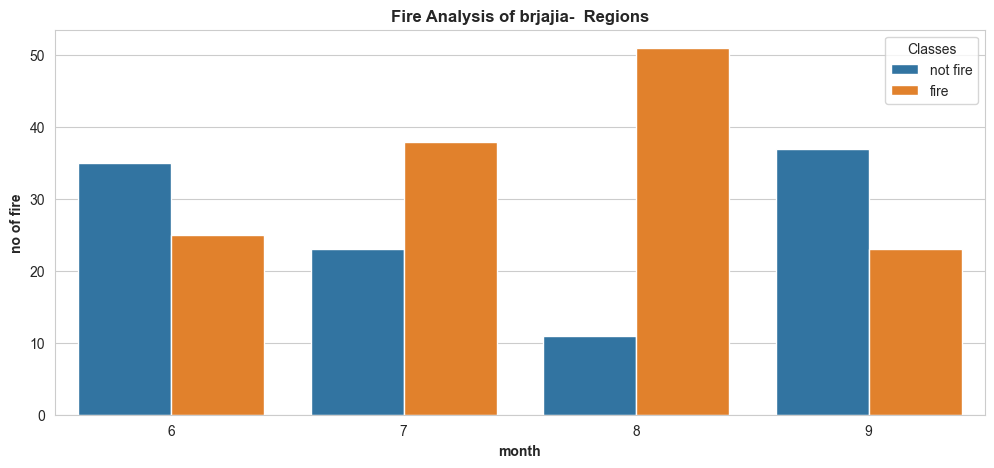

In [47]:
df1=df.loc[df["Region"]==0]
plt.subplots(figsize=(12,5))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=df)
plt.xlabel("month",weight="bold")
plt.ylabel("no of fire",weight="bold")
plt.title("Fire Analysis of brjajia-  Regions",weight='bold')

In [48]:
df["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [49]:
df["Region"].value_counts()

Region
0    122
1    121
Name: count, dtype: int64

In [50]:
df.groupby(["Region","Classes"]).size().unstack(fill_value=0)


Classes,fire,not fire
Region,,
0,59,63
1,78,43


the percentage of the fire in brjajia region in forest is 48.36%
the percentage of the not fire in brjajia region in forest is 51.64%
the percentage of the fire in sidi bel region in forest is 64.46%
the percentage of the not fire in sidi bel region in forest is 35.54%


Text(0.5, 1.0, 'percentage if fire & not fire in sidi_bel region')

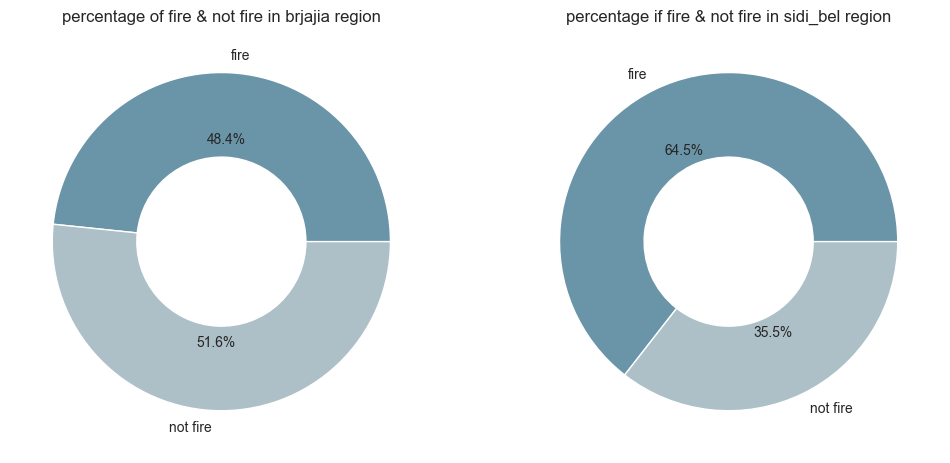

In [51]:
#forest fire in brjaja region
a=df[(df["Region"]==0) & (df["Classes"]=="fire")]
#forest not fire in brjaja region
a1=df[(df["Region"]==0) & (df["Classes"]=="not fire")]
#forest fire in sidi bel region
b=df[(df["Region"]==1) & (df["Classes"]=="fire")]
#forest fire in sidi bel region
b1=df[(df["Region"]==1) & (df["Classes"]=="not fire")]

a_per=round((len(a)/len(df[df["Region"]==0]))*100,2)
a1_per=round((len(a1)/len(df[df["Region"]==0]))*100,2)
b_per=round((len(b)/len(df[df["Region"]==1]))*100,2)
b1_per=round((len(b1)/len(df[df["Region"]==1]))*100,2)


print(f"the percentage of the fire in brjajia region in forest is {a_per:.2f}%")
print(f"the percentage of the not fire in brjajia region in forest is {a1_per:.2f}%")
print(f"the percentage of the fire in sidi bel region in forest is {b_per:.2f}%")
print(f"the percentage of the not fire in sidi bel region in forest is {b1_per:.2f}%")


brjajia_region=[a_per,a1_per]
sidi_bel_region=[b_per,b1_per]
labels1=["fire","not fire"]
labels2=["fire","not fire"]
colors=["#6A95A8","#ADBFC7"]
fig,axes=plt.subplots(1,2,figsize=(12,6))
wedges1,text1,autoetext1=axes[0].pie(brjajia_region,labels=labels1,autopct="%1.1f%%",wedgeprops=dict(width=0.5),colors=colors)
axes[0].set_title("percentage of fire & not fire in brjajia region")
wedges2,text2,autotext2=axes[1].pie(sidi_bel_region,labels=labels2,autopct="%1.1f%%",wedgeprops=dict(width=0.5),colors=colors)
axes[1].set_title("percentage if fire & not fire in sidi_bel region")

In [53]:
dff.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


### Model training

In [54]:
#independent and dependent
x=dff.drop("FWI",axis=1)
y=dff["FWI"]

In [56]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [57]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)


In [59]:
xtrain.shape

(182, 11)

In [60]:
ytrain.shape

(182,)

In [61]:
xtest.shape

(61, 11)

In [62]:
ytest.shape

(61,)

In [63]:
xtrain.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

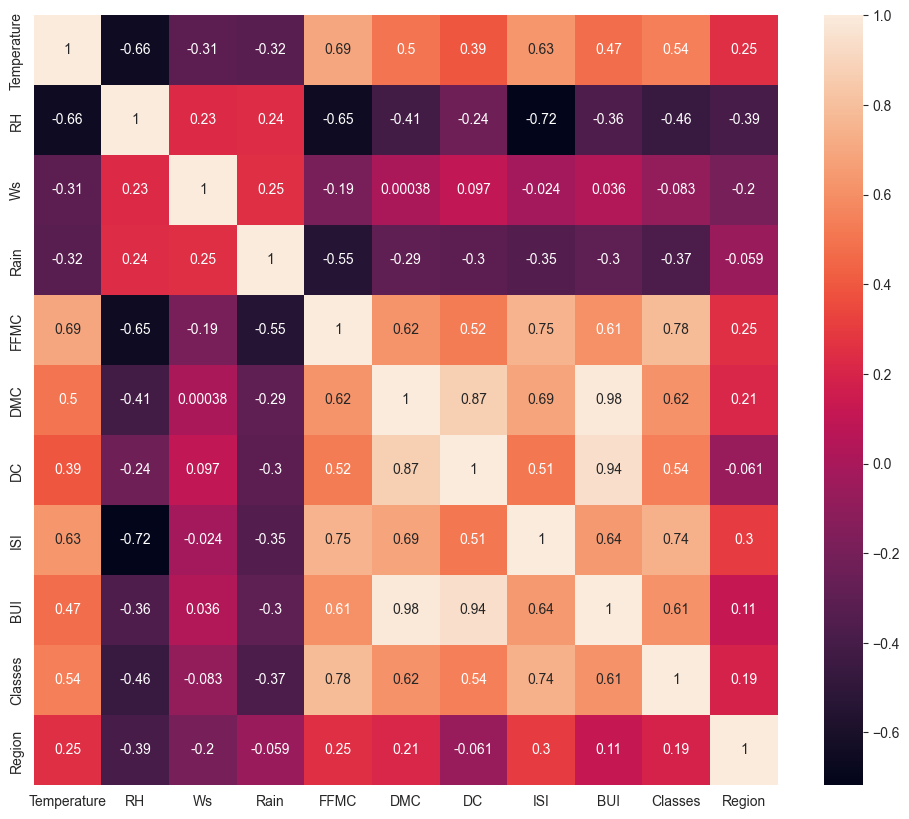

In [66]:
plt.figure(figsize=(12,10))
corr=xtrain.corr()
sns.heatmap(corr,annot=True)

In [67]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.transform(xtest)

In [70]:
xtrain_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.77269802,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.90344718,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  0.38339978,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.03419633,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.18383528,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.99290713,
        -1.10431526, -0.98907071]])

In [71]:
xtest_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.91560671e-01,  2.03772218e-01,  1.01256865e-01,
         9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
        -3.97206667e-01,  3.65823283e-01, -4.07976691e-01,
         9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.52248151e-01, -8.37984627e-01, -9.30973317e-01,
        -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
         7.92106304e-01, -6.29633258e-01,  5.21030473e-01,
        -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
  

Text(0.5, 1.0, 'X_train After Scaling')

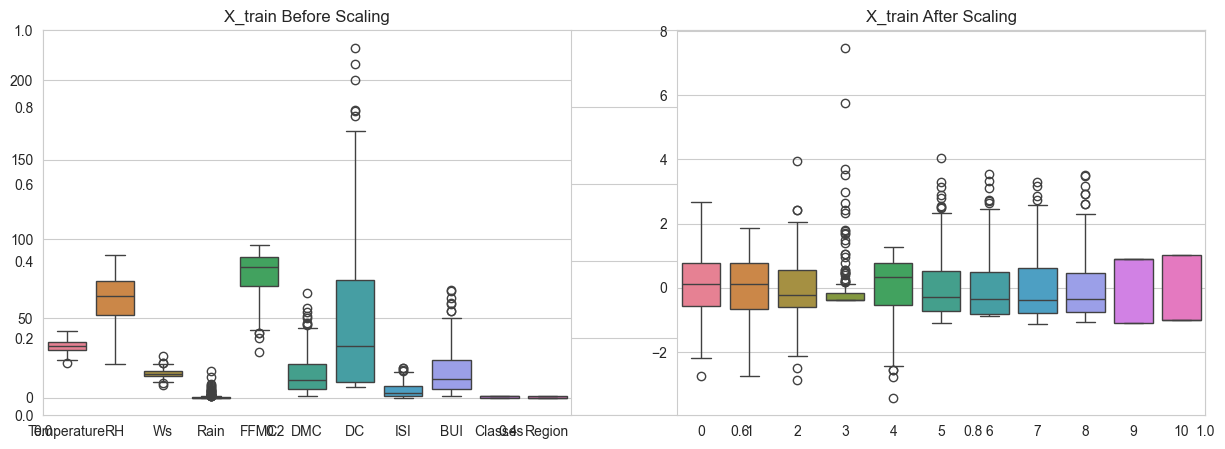

In [75]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=xtrain)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=xtrain_scaled)
plt.title('X_train After Scaling')

## LinearRegression

---------------------------------------
mean_absolute_error:  0.4654460800094094
mean_squared_error:  0.46982435716885224
r2_score:  0.98938502949221
---------------------------------------
accuracy of training data:  0.9723553091099947
accuracy of testing data : 0.98938502949221
---------------------------------------


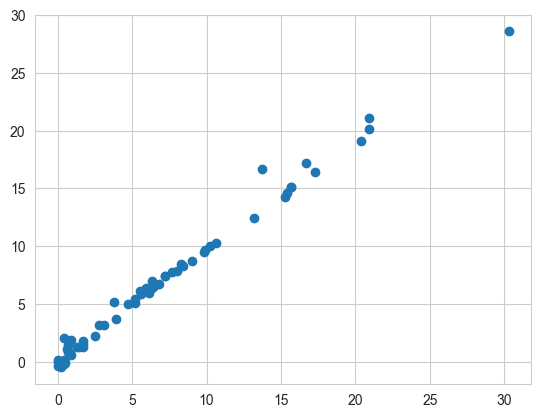

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
linear=LinearRegression()
linear.fit(xtrain_scaled,ytrain)
ypred=linear.predict(xtest_scaled)

mae=mean_absolute_error(ytest,ypred)
r2=r2_score(ytest,ypred)
mse=mean_squared_error(ytest,ypred)

print("---------------------------------------")
print("mean_absolute_error: ",mae)
print("mean_squared_error: ",mse)
print("r2_score: ",r2)
print("---------------------------------------")
print("accuracy of training data: ",linear.score(xtrain_scaled,ytrain))
print("accuracy of testing data :",linear.score(xtest_scaled,ytest))
print("---------------------------------------")

plt.scatter(ytest,ypred)

## Lasso regression

---------------------------------------
mean_absolute_error:  1.0816323165898802
mean_squared_error:  2.0000583482892242
r2_score:  0.9548117077009715
---------------------------------------
accuracy of training data:  0.9471535294281941
accuracy of testing data : 0.9548117077009715
---------------------------------------


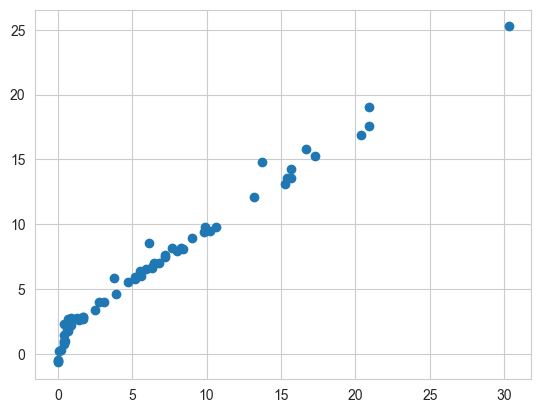

In [93]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
Lasso=Lasso()
Lasso.fit(xtrain_scaled,ytrain)
ypred=Lasso.predict(xtest_scaled)

mae=mean_absolute_error(ytest,ypred)
r2=r2_score(ytest,ypred)
mse=mean_squared_error(ytest,ypred)

print("---------------------------------------")
print("mean_absolute_error: ",mae)
print("mean_squared_error: ",mse)
print("r2_score: ",r2)
print("---------------------------------------")
print("accuracy of training data: ",Lasso.score(xtrain_scaled,ytrain))
print("accuracy of testing data :",Lasso.score(xtest_scaled,ytest))
print("---------------------------------------")

plt.scatter(ytest,ypred)

## cross validation lasso

---------------------------------------
mean_absolute_error:  0.5053525521628113
mean_squared_error:  0.5599752461373925
r2_score:  0.9873482065539131
---------------------------------------
accuracy of training data:  0.971324723567357
accuracy of testing data : 0.9873482065539131
---------------------------------------


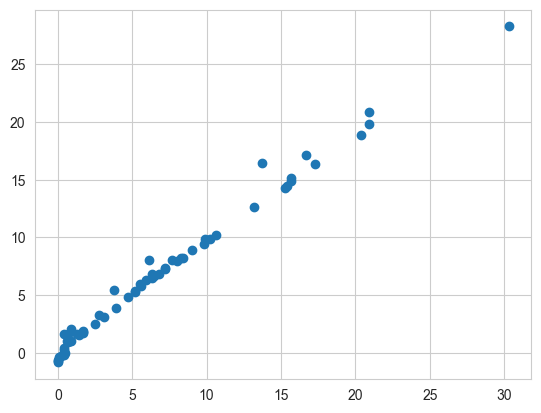

In [102]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(xtrain_scaled,ytrain)
ypred=lassocv.predict(xtest_scaled)

mae=mean_absolute_error(ytest,ypred)
r2=r2_score(ytest,ypred)
mse=mean_squared_error(ytest,ypred)

print("---------------------------------------")
print("mean_absolute_error: ",mae)
print("mean_squared_error: ",mse)
print("r2_score: ",r2)
print("---------------------------------------")
print("accuracy of training data: ",lassocv.score(xtrain_scaled,ytrain))
print("accuracy of testing data :",lassocv.score(xtest_scaled,ytest))

print("---------------------------------------")

plt.scatter(ytest,ypred)

In [104]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [105]:
lassocv.alpha_

0.053395191056015395

In [106]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.19961097, 14.9991189 ,  9.9

In [97]:
Lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

## Ridge regression

---------------------------------------
mean_absolute_error:  0.503285697341685
mean_squared_error:  0.5677317795293632
r2_score:  0.9871729594175267
---------------------------------------
accuracy of training data:  0.972155407693018
accuracy of testing data : 0.9871729594175267
---------------------------------------


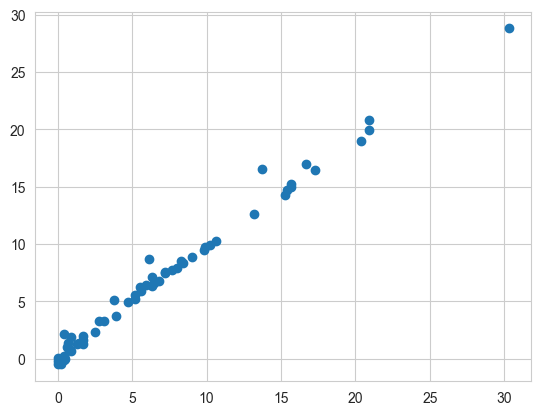

In [94]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
Ridge=Ridge()
Ridge.fit(xtrain_scaled,ytrain)
ypred=Ridge.predict(xtest_scaled)

mae=mean_absolute_error(ytest,ypred)
r2=r2_score(ytest,ypred)
mse=mean_squared_error(ytest,ypred)

print("---------------------------------------")
print("mean_absolute_error: ",mae)
print("mean_squared_error: ",mse)
print("r2_score: ",r2)
print("---------------------------------------")
print("accuracy of training data: ",Ridge.score(xtrain_scaled,ytrain))
print("accuracy of testing data :",Ridge.score(xtest_scaled,ytest))
print("---------------------------------------")

plt.scatter(ytest,ypred)

## cross validation of RidgeCV

---------------------------------------
mean_absolute_error:  0.503285697341685
mean_squared_error:  0.5677317795293632
r2_score:  0.9871729594175267
---------------------------------------
accuracy of training data:  0.972155407693018
accuracy of testing data : 0.9871729594175267
---------------------------------------


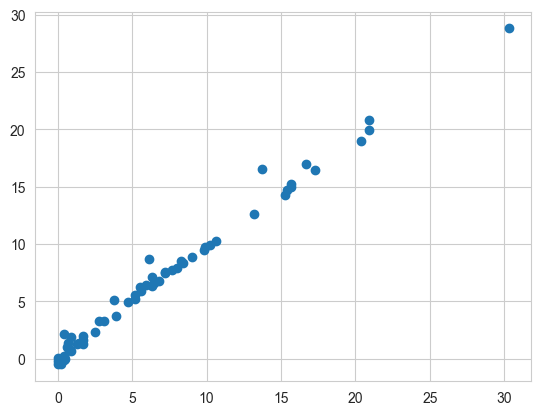

In [108]:
from sklearn.linear_model import RidgeCV
RidgeCV=RidgeCV(cv=5)
RidgeCV.fit(xtrain_scaled,ytrain)
ypred=RidgeCV.predict(xtest_scaled)

mae=mean_absolute_error(ytest,ypred)
r2=r2_score(ytest,ypred)
mse=mean_squared_error(ytest,ypred)

print("---------------------------------------")
print("mean_absolute_error: ",mae)
print("mean_squared_error: ",mse)
print("r2_score: ",r2)
print("---------------------------------------")
print("accuracy of training data: ",RidgeCV.score(xtrain_scaled,ytrain))
print("accuracy of testing data :",RidgeCV.score(xtest_scaled,ytest))

print("---------------------------------------")

plt.scatter(ytest,ypred)

In [96]:
Ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

## ElasticNet

---------------------------------------
mean_absolute_error:  1.6830954467418584
mean_squared_error:  4.396320516000338
r2_score:  0.900671789556956
---------------------------------------
accuracy of training data:  0.909941854142061
accuracy of testing data : 0.900671789556956
---------------------------------------


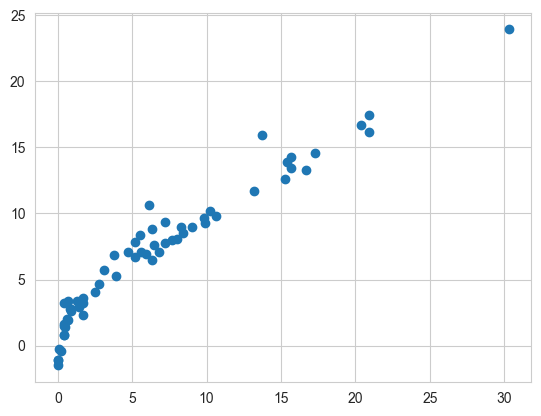

In [98]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
ElasticNet=ElasticNet()
ElasticNet.fit(xtrain_scaled,ytrain)
ypred=ElasticNet.predict(xtest_scaled)

mae=mean_absolute_error(ytest,ypred)
r2=r2_score(ytest,ypred)
mse=mean_squared_error(ytest,ypred)

print("---------------------------------------")
print("mean_absolute_error: ",mae)
print("mean_squared_error: ",mse)
print("r2_score: ",r2)
print("---------------------------------------")
print("accuracy of training data: ",ElasticNet.score(xtrain_scaled,ytrain))
print("accuracy of testing data :",ElasticNet.score(xtest_scaled,ytest))
print("---------------------------------------")

plt.scatter(ytest,ypred)

---------------------------------------
mean_absolute_error:  0.5891683480603581
mean_squared_error:  0.7369662999119062
r2_score:  0.9833493614806597
---------------------------------------
accuracy of training data:  0.9710125640344653
accuracy of testing data : 0.9833493614806597
---------------------------------------


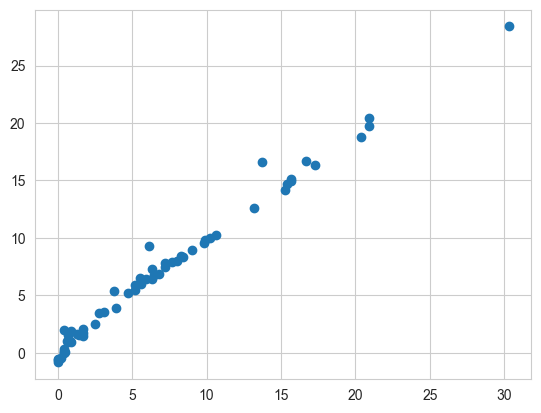

In [110]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
ElasticNetCV=ElasticNetCV()
ElasticNetCV.fit(xtrain_scaled,ytrain)
ypred=ElasticNetCV.predict(xtest_scaled)

mae=mean_absolute_error(ytest,ypred)
r2=r2_score(ytest,ypred)
mse=mean_squared_error(ytest,ypred)

print("---------------------------------------")
print("mean_absolute_error: ",mae)
print("mean_squared_error: ",mse)
print("r2_score: ",r2)
print("---------------------------------------")
print("accuracy of training data: ",ElasticNetCV.score(xtrain_scaled,ytrain))
print("accuracy of testing data :",ElasticNetCV.score(xtest_scaled,ytest))
print("---------------------------------------")

plt.scatter(ytest,ypred)

In [112]:
ElasticNetCV.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11